# 2.4 Statistical Decision Theory

In [141]:
%load_ext autoreload
%autoreload 2

import src
import numpy as np
import scipy.stats as ss

import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
X, Y, parameters = src.orange_blue_dataset(1000, blue_mean=[3, 1], orange_mean=[-1, 0])

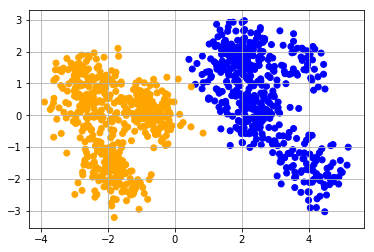

In [153]:
plt.figure()
colors = ['blue' if x == 0 else 'orange' for x in Y]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.grid()
plt.show()

## Bayes optimal classifier

In [154]:
blue_means = parameters['blue_means']
blue_cov = parameters['blue_cov_generator']
orange_means = parameters['orange_means']
orange_cov = parameters['orange_cov_generator']

In [155]:
def density(obs: np.ndarray, means=blue_means, cov=blue_cov) -> np.ndarray:
    densities = np.zeros((len(means), len(obs)))
    for i, m in enumerate(means):
        densities[i, :] = ss.multivariate_normal(mean=m, cov=blue_cov).pdf(obs)
    return densities.mean(axis=0)

In [187]:
def plot_bayes_boundary(ax, blue_means, blue_cov, orange_means, orange_cov):
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xx = np.linspace(start=xmin, stop=xmax, num=100)
    yy = np.linspace(start=ymin, stop=ymax, num=100)
    X_grid, Y_grid = np.meshgrid(xx, yy)
    xxyy = np.array([(x,y) for x in xx for y in yy])
    Z_grid_prob_blue = density(xxyy, blue_means, blue_cov).reshape(X_grid.shape, order='F')
    Z_grid_prob_orange = density(xxyy, orange_means, orange_cov).reshape(X_grid.shape, order='F')    
    Z_grid = (Z_grid_prob_orange > Z_grid_prob_blue).astype(int)
    return ax.contourf(X_grid, Y_grid, Z_grid, 1, alpha=0.2, colors=['blue', 'orange'])

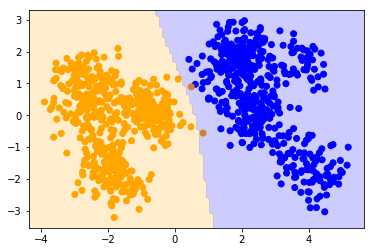

In [188]:
plt.figure()
ax = plt.subplot(111)
colors = ['blue' if x == 0 else 'orange' for x in Y]
ax.scatter(X[:, 0], X[:, 1], c=colors)
plot_bayes_boundary(ax, blue_means, blue_cov, orange_means, orange_cov)
plt.show()